<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/examples/python_dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install python-dp

     |████████████████████████████████| 3.5 MB 5.1 MB/s 


In [3]:
import pydp as dp # by convention our package is to be imported as dp (dp for Differential Privacy!)
from pydp.algorithms.laplacian import BoundedSum, BoundedMean, Count, Max
import pandas as pd
import statistics 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
url1 = 'https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/01.csv'
df1 = pd.read_csv(url1)
df1.head()

,id,first_name,last_name,email,sales_amount,state
0,1,Osbourne,Gillions,ogillions0@feedburner.com,31.94,Florida
1,2,Glynn,Friett,gfriett1@blog.com,12.46,California
2,3,Jori,Blockley,jblockley2@unesco.org,191.14,Colorado
3,4,Garald,Dorian,gdorian3@webeden.co.uk,126.58,Texas
4,5,Mercy,Pilkington,mpilkington4@jugem.jp,68.32,Florida


In [8]:
df1.shape

(1000, 6)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1000 non-null   int64  
 1   first_name    1000 non-null   object 
 2   last_name     1000 non-null   object 
 3   email         1000 non-null   object 
 4   sales_amount  1000 non-null   float64
 5   state         1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [10]:
df1.describe()

,id,sales_amount
count,1000.000000,1000.000000
mean,500.500000,127.931380
std,288.819436,70.266893
min,1.000000,5.410000
25%,250.750000,67.880000
50%,500.500000,124.165000
75%,750.250000,188.425000
max,1000.000000,249.520000


In [11]:
df1.describe(include="all")

,id,first_name,last_name,email,sales_amount,state
count,1000.000000,1000,1000,1000,1000.000000,1000
unique,NaN,927,991,1000,NaN,47
top,NaN,Pennie,Addionizio,tgowang7@yellowbook.com,NaN,California
freq,NaN,4,2,1,NaN,114
mean,500.500000,NaN,NaN,NaN,127.931380,NaN
std,288.819436,NaN,NaN,NaN,70.266893,NaN
min,1.000000,NaN,NaN,NaN,5.410000,NaN
25%,250.750000,NaN,NaN,NaN,67.880000,NaN
50%,500.500000,NaN,NaN,NaN,124.165000,NaN
75%,750.250000,NaN,NaN,NaN,188.425000,NaN


In [ ]:
URL = "https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data"

df_list = []
for i in range(1,6):
    url = URL + "/0" + str(i) + ".csv"
    print(url)
    df = pd.read_csv(url)
    df_list.append(df)

df = pd.concat(df_list)
df.head()



https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/01.csv
https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/02.csv
https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/03.csv
https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/04.csv
https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/05.csv


,id,first_name,last_name,email,sales_amount,state
0,1,Osbourne,Gillions,ogillions0@feedburner.com,31.94,Florida
1,2,Glynn,Friett,gfriett1@blog.com,12.46,California
2,3,Jori,Blockley,jblockley2@unesco.org,191.14,Colorado
3,4,Garald,Dorian,gdorian3@webeden.co.uk,126.58,Texas
4,5,Mercy,Pilkington,mpilkington4@jugem.jp,68.32,Florida


In [ ]:
df.shape

(5000, 6)

In [ ]:
df2 = df[1:]
df2.shape

(4999, 6)

In [ ]:
total = df["sales_amount"].sum()

In [ ]:
total2 = df2["sales_amount"].sum()

In [ ]:
total - total2

31.940000000060536

In [ ]:
dp = BoundedSum(epsilon= 1.5, lower_bound =  5, upper_bound = 250, dtype ='float') 

dp_sum = dp.quick_result(df['sales_amount'].to_list())
dp_sum = round(dp_sum, 2)
print(dp_sum)

dp_sum2 = dp.quick_result(df2['sales_amount'].to_list())
dp_sum2 = round(dp_sum2, 2)
print(dp_sum2)
print(dp_sum - dp_sum2)

636663.06
636519.25
143.81000000005588



## observations.

- Now that we've calculated the differentially private sum on the original and the second dataset, it's straightforward to verify that that the differentially private sums are not equal to sums under the non-differentially private setting.
- Also, the difference is no longer equal to the amount that Osbourne spent indicating that membership attacks would now be unsuccessful, regardless of access to any other customer records.
- Interestingly, the differentially private sum values are still comparable and are not very different.
- We've therefore succeeded in ensuring differential privacy in our simple example!

## Laplace Mechanism

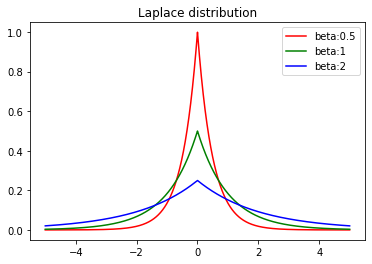

In [12]:
def laplace_function(x,beta):
    result = (1/(2*beta)) * np.e**(-1*(np.abs(x)/beta))
    return result

x = np.linspace(-5,5,10000)
y1 = [laplace_function(x_,0.5) for x_ in x]
y2 = [laplace_function(x_,1) for x_ in x]
y3 = [laplace_function(x_,2) for x_ in x]


plt.plot(x,y1,color='r',label='beta:0.5')
plt.plot(x,y2,color='g',label='beta:1')
plt.plot(x,y3,color='b',label='beta:2')
plt.title("Laplace distribution")
plt.legend()
plt.show()

In [13]:
def noisyCount(sensitivety,epsilon):
    beta = sensitivety/epsilon
    u1 = np.random.random()
    u2 = np.random.random()
    if u1 <= 0.5:
        n_value = -beta*np.log(1.-u2)
    else:
        n_value = beta*np.log(u2)
    print(n_value)
    return n_value

def laplace_mech(data,sensitivety,epsilon):
    for i in range(len(data)):
        data[i] += noisyCount(sensitivety,epsilon)
    return data

if __name__ =='__main__':
    x = [1.,1.,0.]
    sensitivety = 1
    epsilon = 1
    data = laplace_mech(x,sensitivety,epsilon)
    for j in data:
        print(j)

1.3385247155961835
1.609426037000019
1.0696322137699037
2.3385247155961837
2.609426037000019
1.0696322137699037
